In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display

In [3]:
df = pd.read_csv('weather_mysore.csv')
print("Original Dataset:")
display(df)

Original Dataset:


,Date,Temperature,Humidity,PrecipitationAmount,WindSpeed,WD2M,MinTemp,MaxTemp
0,03-01-1981,23.53,60.12,0.02,2.12,82.38,17.83,30.94
1,04-01-1981,23.00,57.38,0.02,2.04,94.94,16.89,31.48
2,05-01-1981,22.47,53.62,0.01,1.26,116.06,14.34,31.49
3,06-01-1981,23.27,46.44,0.02,1.06,80.12,15.30,32.23
4,07-01-1981,22.74,49.50,0.00,1.50,284.12,14.58,32.88
...,...,...,...,...,...,...,...,...
15850,27-05-2024,25.67,78.56,2.78,3.64,264.81,19.17,32.23
15851,28-05-2024,25.61,82.19,1.65,3.78,264.62,22.92,30.08
15852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date                   3
Temperature            3
Humidity               3
PrecipitationAmount    3
WindSpeed              3
WD2M                   3
MinTemp                3
MaxTemp                3
dtype: int64


In [5]:
df= df.iloc[:-3].copy()

In [6]:
df

,Date,Temperature,Humidity,PrecipitationAmount,WindSpeed,WD2M,MinTemp,MaxTemp
0,03-01-1981,23.53,60.12,0.02,2.12,82.38,17.83,30.94
1,04-01-1981,23.00,57.38,0.02,2.04,94.94,16.89,31.48
2,05-01-1981,22.47,53.62,0.01,1.26,116.06,14.34,31.49
3,06-01-1981,23.27,46.44,0.02,1.06,80.12,15.30,32.23
4,07-01-1981,22.74,49.50,0.00,1.50,284.12,14.58,32.88
...,...,...,...,...,...,...,...,...
15847,24-05-2024,26.57,77.69,22.93,1.77,282.19,22.33,31.86
15848,25-05-2024,23.61,86.06,43.04,3.19,263.00,20.58,26.33
15849,26-05-2024,24.76,79.19,1.42,3.80,268.25,20.17,30.87
15850,27-05-2024,25.67,78.56,2.78,3.64,264.81,19.17,32.23


In [7]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,Temperature,Humidity,PrecipitationAmount,WindSpeed,WD2M,MinTemp,MaxTemp
count,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000
mean,24.455647,67.461255,2.415662,2.585313,183.442393,19.197151,30.951169
std,2.823795,17.266164,5.595737,1.164229,81.138178,2.755378,3.796212
min,16.780000,15.380000,0.000000,0.340000,13.940000,9.090000,20.970000
25%,22.650000,54.690000,0.000000,1.710000,103.250000,17.850000,27.940000
50%,23.750000,73.620000,0.370000,2.350000,179.940000,19.630000,30.060000
75%,26.050000,81.250000,2.622500,3.250000,263.880000,20.840000,33.710000
max,33.670000,95.060000,323.700000,7.660000,339.500000,27.430000,41.460000


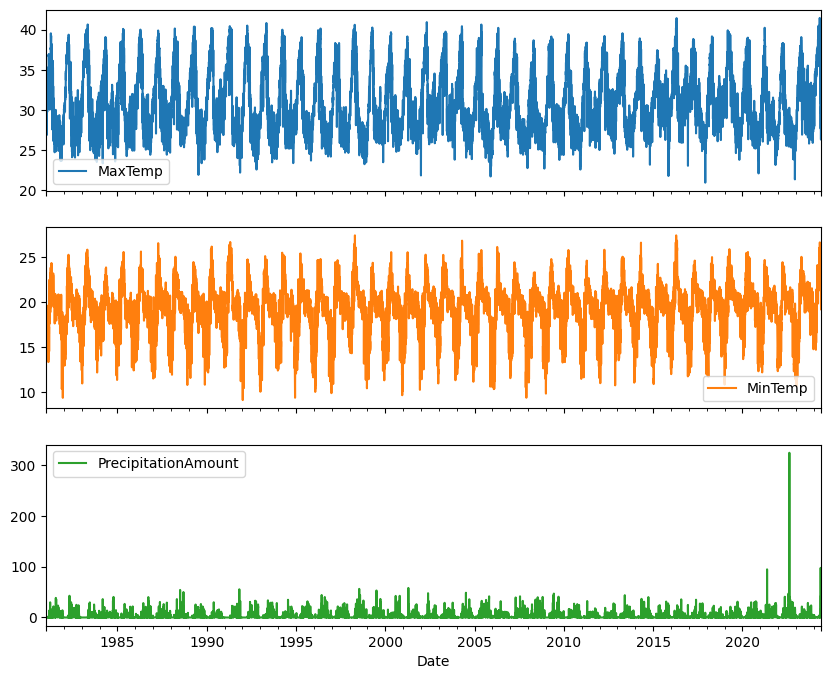

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
df[['MaxTemp', 'MinTemp', 'PrecipitationAmount']].plot(subplots=True, figsize=(10, 8))
plt.show()

In [10]:
df.apply(pd.isnull).sum()

Temperature            0
Humidity               0
PrecipitationAmount    0
WindSpeed              0
WD2M                   0
MinTemp                0
MaxTemp                0
dtype: int64

In [11]:
df.dtypes

Temperature            float64
Humidity               float64
PrecipitationAmount    float64
WindSpeed              float64
WD2M                   float64
MinTemp                float64
MaxTemp                float64
dtype: object

In [12]:
df.index.year.value_counts().sort_index()

Date
1981    363
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    149
Name: count, dtype: int64

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

# Function to calculate accuracy
def calculate_accuracy(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    mape_max_temp = calculate_mape(true_values[:, 0], predicted_values[:, 0])
    mape_min_temp = calculate_mape(true_values[:, 1], predicted_values[:, 1])
    
    accuracy_max_temp = 100 - mape_max_temp
    accuracy_min_temp = 100 - mape_min_temp
    
    return mae, accuracy_max_temp, accuracy_min_temp

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load your dataset
# Replace 'weather_mysore.csv' with the path to your CSV file
df = load_data('weather_mysore.csv')

# Parse the date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Feature Engineering
df['prev_max_temp'] = df['MaxTemp'].shift(1)
df['prev_min_temp'] = df['MinTemp'].shift(1)
df['prev_precipitation'] = df['PrecipitationAmount'].shift(1)
df = df.dropna()

# Define features and target variables
features = ['prev_max_temp', 'prev_min_temp', 'prev_precipitation']
target = ['MaxTemp', 'MinTemp', 'PrecipitationAmount']

# Splitting Data into Training and Testing Sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Initialize and Train RandomForest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
predictions = model.predict(X_test)
mae,accuracy_max_temp, accuracy_min_temp = calculate_accuracy(y_test.values[:, :2], predictions[:, :2])

print("\n*Random Forest Model Performance*")
print("Mean Absolute Error:", mae)
print("Max Temp Accuracy:", accuracy_max_temp, "%")
print("Min Temp Accuracy:", accuracy_min_temp, "%")


# Forecasting for the next 7 days
forecast_days = 7
last_known = df.iloc[-1].copy()
forecasts = []

for _ in range(forecast_days):
    features = np.array([[last_known['prev_max_temp'], last_known['prev_min_temp'], last_known['prev_precipitation']]])
    prediction = model.predict(features)[0]

    average_temp = int((prediction[0] + prediction[1]) / 2)
    precipitation = prediction[2]
    
    if precipitation < 1:
        weather_condition = "Sunny"
    elif 1.01 <= precipitation <= 2:
        weather_condition = "Partly Cloudy"
    elif 2.01 <= precipitation <= 5:
        weather_condition = "Cloudy"
    elif 5 <= precipitation <= 10:
        weather_condition = "Light Rain"
    else:
        weather_condition = "Rainy"

    max_temp_str = f"{int(prediction[0])} °C"
    min_temp_str = f"{int(prediction[1])} °C"
    average_temp_str = f"{average_temp} °C"
    precipitation_str = f"{precipitation:.4f}"
    
    forecasts.append((max_temp_str, min_temp_str, precipitation_str, average_temp_str, weather_condition))
    last_known['prev_max_temp'], last_known['prev_min_temp'], last_known['prev_precipitation'] = prediction

forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_days)
forecast_df = pd.DataFrame(forecasts, columns=['MaxTemp', 'MinTemp', 'PrecipitationAmount', 'AverageTemp', 'Weather'], index=forecast_dates)

print("\nForecast for the next 7 days:")
print(forecast_df)



*Random Forest Model Performance*
Mean Absolute Error: 0.9551303744499999
Max Temp Accuracy: 96.44431305640973 %
Min Temp Accuracy: 95.57215245177655 %

Forecast for the next 7 days:
           MaxTemp MinTemp PrecipitationAmount AverageTemp        Weather
2024-05-29   32 °C   19 °C              2.5828       25 °C         Cloudy
2024-05-30   32 °C   19 °C              1.7225       25 °C  Partly Cloudy
2024-05-31   31 °C   19 °C              3.4911       25 °C         Cloudy
2024-06-01   30 °C   19 °C              2.3165       25 °C         Cloudy
2024-06-02   29 °C   20 °C              3.6010       24 °C         Cloudy
2024-06-03   29 °C   20 °C              5.8472       24 °C     Light Rain
2024-06-04   28 °C   20 °C              5.1603       24 °C     Light Rain


C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

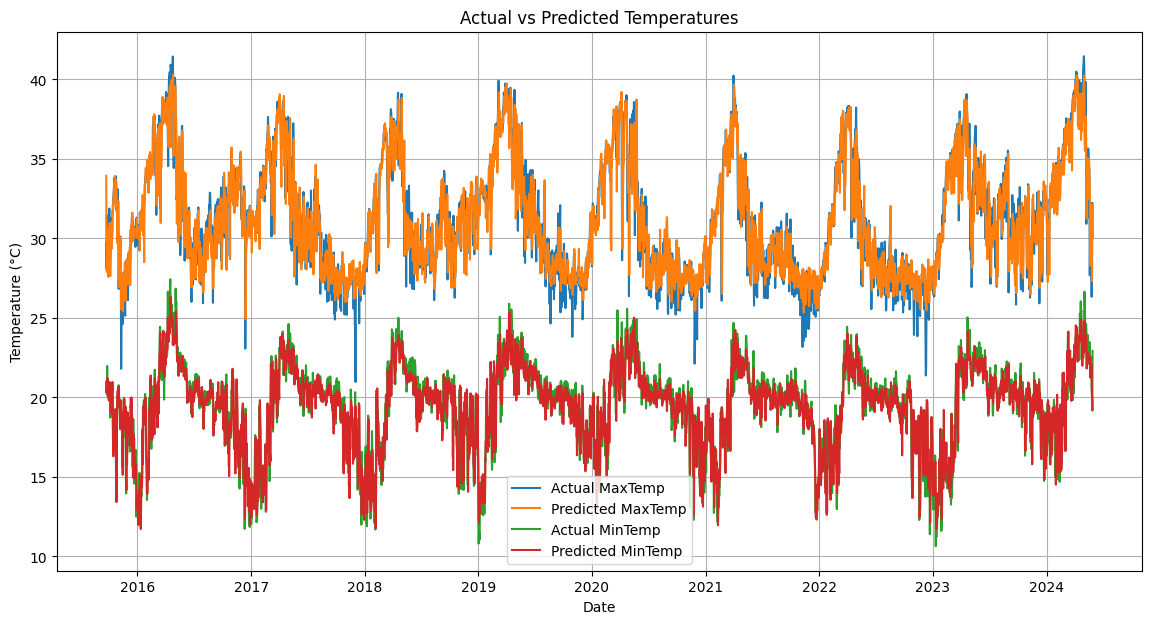

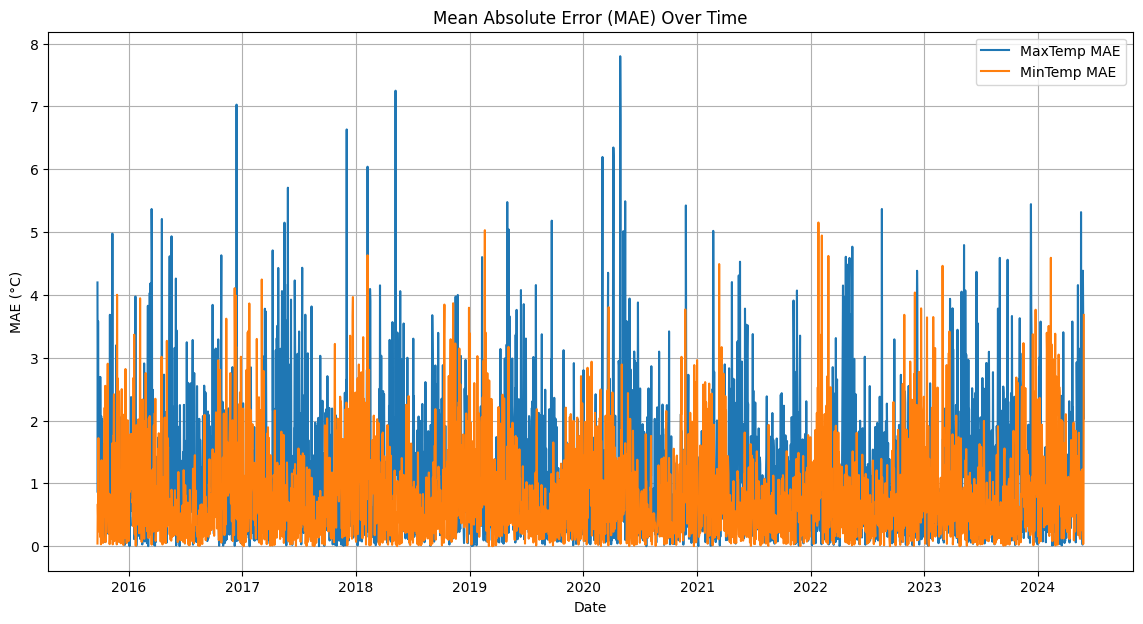

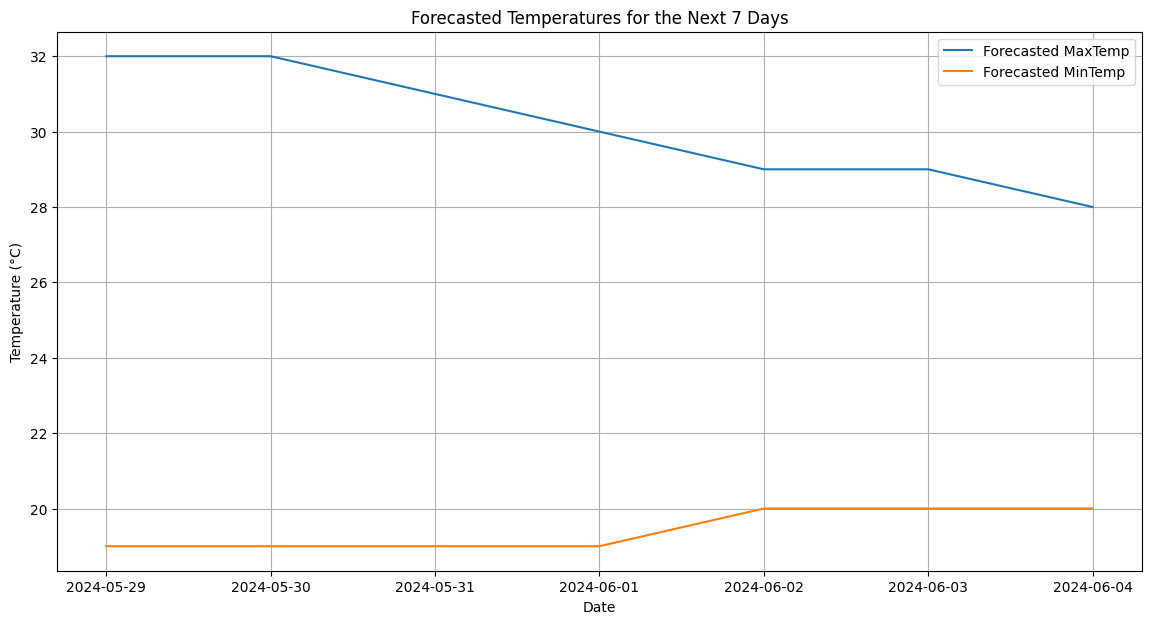

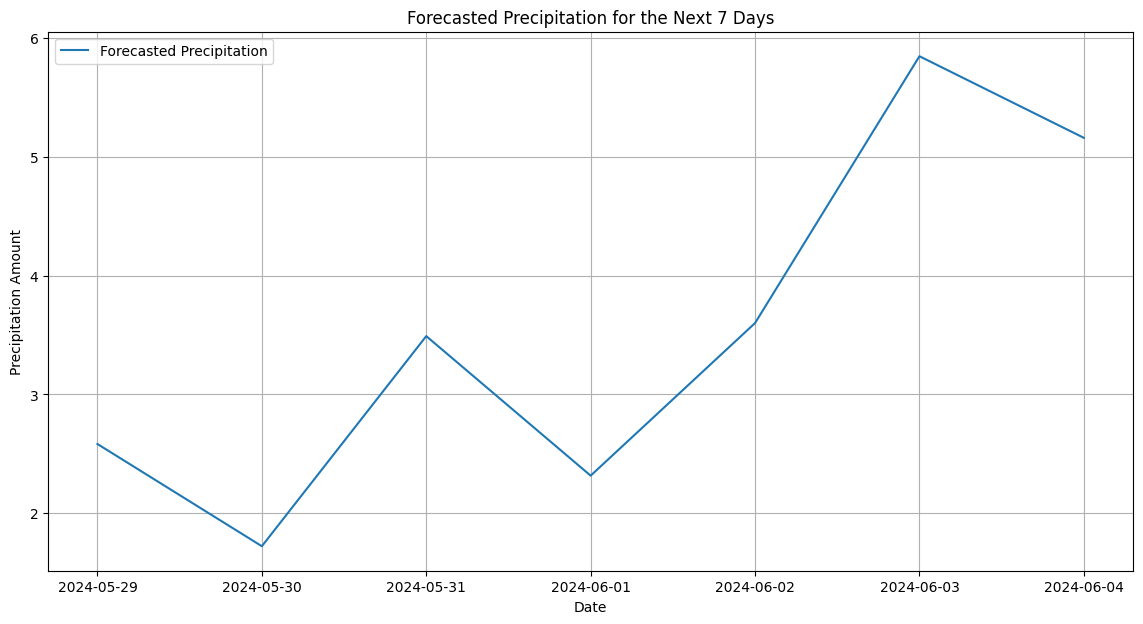


Forecast for the next 7 days:


,MaxTemp,MinTemp,PrecipitationAmount,AverageTemp,Weather
2024-05-29,32 °C,19 °C,2.5828,25 °C,Cloudy
2024-05-30,32 °C,19 °C,1.7225,25 °C,Partly Cloudy
2024-05-31,31 °C,19 °C,3.4911,25 °C,Cloudy
2024-06-01,30 °C,19 °C,2.3165,25 °C,Cloudy
2024-06-02,29 °C,20 °C,3.6010,24 °C,Cloudy
2024-06-03,29 °C,20 °C,5.8472,24 °C,Light Rain
2024-06-04,28 °C,20 °C,5.1603,24 °C,Light Rain


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

# Plotting Actual vs Predicted values for Testing Set
plt.figure(figsize=(14, 7))
plt.plot(test['Date'], y_test['MaxTemp'], label='Actual MaxTemp')
plt.plot(test['Date'], predictions[:, 0], label='Predicted MaxTemp')
plt.plot(test['Date'], y_test['MinTemp'], label='Actual MinTemp')
plt.plot(test['Date'], predictions[:, 1], label='Predicted MinTemp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Mean Absolute Error (MAE) over Time
mae_max_temp = np.abs(y_test['MaxTemp'] - predictions[:, 0])
mae_min_temp = np.abs(y_test['MinTemp'] - predictions[:, 1])

plt.figure(figsize=(14, 7))
plt.plot(test['Date'], mae_max_temp, label='MaxTemp MAE')
plt.plot(test['Date'], mae_min_temp, label='MinTemp MAE')
plt.xlabel('Date')
plt.ylabel('MAE (°C)')
plt.title('Mean Absolute Error (MAE) Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Forecast Summary for the Next 7 Days
forecast_days = 7
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_days)
forecast_df = pd.DataFrame(forecasts, columns=['MaxTemp', 'MinTemp', 'PrecipitationAmount', 'AverageTemp', 'Weather'], index=forecast_dates)

plt.figure(figsize=(14, 7))
plt.plot(forecast_df.index, forecast_df['MaxTemp'].str.rstrip(' °C').astype(float), label='Forecasted MaxTemp')
plt.plot(forecast_df.index, forecast_df['MinTemp'].str.rstrip(' °C').astype(float), label='Forecasted MinTemp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Forecasted Temperatures for the Next 7 Days')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(forecast_df.index, forecast_df['PrecipitationAmount'].str.rstrip(' ').astype(float), label='Forecasted Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation Amount')
plt.title('Forecasted Precipitation for the Next 7 Days')
plt.legend()
plt.grid(True)
plt.show()

print("\nForecast for the next 7 days:")
display(forecast_df)
